# Look for post starburst galaxies from JM fastspec catalog of DESI EDR

* cut fastspec catalog based on 
  * Virgo RA, DEC
  * redshift
  
* identify post starburst spectra using JM catalog
* visually inspect - how many are there, where are they

* then match post starburst galaxies to VFS, remembering that on VFS can have multiple spectra

In [3]:
from astropy.io import fits
from astropy.table import Table
import os
import numpy as np
from matplotlib import pyplot as plt

homedir = os.getenv("HOME")

In [4]:
infile = os.path.join(homedir,'research/DESI/fastspecfit-fuji-v3.2/fastspec-fuji.fits')

In [25]:
fspectable = fits.open(infile)
fspec = Table(fspectable['FASTSPEC'].data)
fmeta = Table(fspectable['METADATA'].data)

In [26]:
fmeta.colnames

['TARGETID',
 'SURVEY',
 'PROGRAM',
 'HEALPIX',
 'TILEID_LIST',
 'RA',
 'DEC',
 'COADD_FIBERSTATUS',
 'DESI_TARGET',
 'BGS_TARGET',
 'MWS_TARGET',
 'SCND_TARGET',
 'Z',
 'ZWARN',
 'DELTACHI2',
 'SPECTYPE',
 'Z_RR',
 'TSNR2_BGS',
 'TSNR2_LRG',
 'TSNR2_ELG',
 'TSNR2_QSO',
 'TSNR2_LYA',
 'PHOTSYS',
 'LS_ID',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_W3',
 'FLUX_W4',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FLUX_IVAR_W3',
 'FLUX_IVAR_W4',
 'EBV',
 'MW_TRANSMISSION_G',
 'MW_TRANSMISSION_R',
 'MW_TRANSMISSION_Z',
 'MW_TRANSMISSION_W1',
 'MW_TRANSMISSION_W2',
 'MW_TRANSMISSION_W3',
 'MW_TRANSMISSION_W4',
 'CMX_TARGET',
 'SV1_DESI_TARGET',
 'SV1_BGS_TARGET',
 'SV1_MWS_TARGET',
 'SV2_DESI_TARGET',
 'SV2_BGS_TARGET',
 'SV2_MWS_TARGET',
 'SV3_DESI_TARGET',
 'SV3_BGS_TARGET',
 'SV3_MWS_TARGET',
 'SV1_SCND_TARGET',
 'SV2_SCND_TARGE

In [28]:
ramin = 100
ramax = 280
decmin = -1.3
decmax = 75
zmin = 500./3e5
zmax = 3500./3e5

keepflag = (fmeta['RA'] > ramin) & (fmeta['RA'] < ramax) & (fmeta['DEC'] >decmin) & (fmeta['DEC'] < decmax) & (fmeta['Z'] > zmin) & (fmeta['Z'] < zmax)
print(f"{np.sum(keepflag)}")

1993


In [29]:
outfile = os.path.join(homedir,'research/DESI/fastspecfit-fuji-v3.2/fastspec-fuji-fastspec-virgo.fits')
fspec[keepflag].write(outfile,format='fits',overwrite=True)


outfile = os.path.join(homedir,'research/DESI/fastspecfit-fuji-v3.2/fastspec-fuji-meta-virgo.fits')
fmeta[keepflag].write(outfile,format='fits',overwrite=True)



In [30]:
infile = os.path.join(homedir,'research/DESI/fastspecfit-fuji-v3.2/fastspec-fuji-fastspec-virgo.fits')
vfspec = Table.read(infile)


infile = os.path.join(homedir,'research/DESI/fastspecfit-fuji-v3.2/fastspec-fuji-meta-virgo.fits')
vmeta = Table.read(infile)


In [32]:
vfspec.colnames

['TARGETID',
 'SURVEY',
 'PROGRAM',
 'HEALPIX',
 'Z',
 'COEFF',
 'RCHI2',
 'RCHI2_CONT',
 'RCHI2_PHOT',
 'SNR_B',
 'SNR_R',
 'SNR_Z',
 'SMOOTHCORR_B',
 'SMOOTHCORR_R',
 'SMOOTHCORR_Z',
 'VDISP',
 'VDISP_IVAR',
 'AV',
 'AGE',
 'ZZSUN',
 'LOGMSTAR',
 'SFR',
 'DN4000',
 'DN4000_OBS',
 'DN4000_IVAR',
 'DN4000_MODEL',
 'FLUX_SYNTH_G',
 'FLUX_SYNTH_R',
 'FLUX_SYNTH_Z',
 'FLUX_SYNTH_SPECMODEL_G',
 'FLUX_SYNTH_SPECMODEL_R',
 'FLUX_SYNTH_SPECMODEL_Z',
 'FLUX_SYNTH_PHOTMODEL_G',
 'FLUX_SYNTH_PHOTMODEL_R',
 'FLUX_SYNTH_PHOTMODEL_Z',
 'FLUX_SYNTH_PHOTMODEL_W1',
 'FLUX_SYNTH_PHOTMODEL_W2',
 'FLUX_SYNTH_PHOTMODEL_W3',
 'FLUX_SYNTH_PHOTMODEL_W4',
 'ABSMAG10_DECAM_G',
 'ABSMAG10_IVAR_DECAM_G',
 'KCORR10_DECAM_G',
 'ABSMAG10_DECAM_R',
 'ABSMAG10_IVAR_DECAM_R',
 'KCORR10_DECAM_R',
 'ABSMAG10_DECAM_Z',
 'ABSMAG10_IVAR_DECAM_Z',
 'KCORR10_DECAM_Z',
 'ABSMAG00_U',
 'ABSMAG00_IVAR_U',
 'KCORR00_U',
 'ABSMAG00_B',
 'ABSMAG00_IVAR_B',
 'KCORR00_B',
 'ABSMAG00_V',
 'ABSMAG00_IVAR_V',
 'KCORR00_V',
 'ABSMAG01_S

<ipython-input-43-1ae3d15888f5>:3: RuntimeWarning: divide by zero encountered in true_divide
  x = vfspec['NII_6584_FLUX']/vfspec['HALPHA_FLUX']
<ipython-input-43-1ae3d15888f5>:3: RuntimeWarning: invalid value encountered in true_divide
  x = vfspec['NII_6584_FLUX']/vfspec['HALPHA_FLUX']
<ipython-input-43-1ae3d15888f5>:5: RuntimeWarning: divide by zero encountered in true_divide
  y = vfspec['OIII_5007_FLUX']/vfspec['HBETA_FLUX']
<ipython-input-43-1ae3d15888f5>:5: RuntimeWarning: invalid value encountered in true_divide
  y = vfspec['OIII_5007_FLUX']/vfspec['HBETA_FLUX']


Text(0, 0.5, 'OIII_5007_FLUX/HBETA_FLUX')

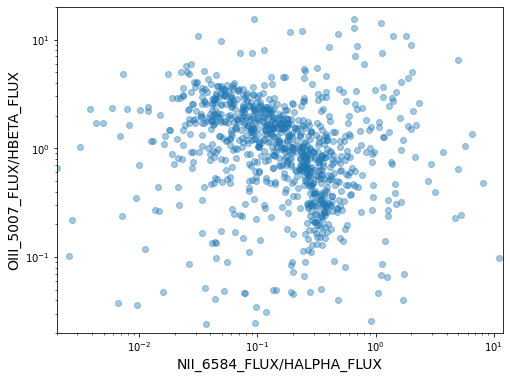

In [43]:
# BPT diagram
plt.figure(figsize=(8,6))
x = vfspec['NII_6584_FLUX']/vfspec['HALPHA_FLUX']

y = vfspec['OIII_5007_FLUX']/vfspec['HBETA_FLUX']

plt.scatter(x,y,alpha=.4)

plt.ylim(.02,20)
plt.xlim(.002,12)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("NII_6584_FLUX/HALPHA_FLUX",fontsize=14)
plt.ylabel("OIII_5007_FLUX/HBETA_FLUX",fontsize=14)